In [3]:
# Import necessary libraries
!pip install ppscore
import pandas as pd
import numpy as np
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
# Ensure the 'adult_with_headers.csv' file is in the same directory as your script
df = pd.read_csv('adult_with_headers.csv')

# --- Data Exploration ---
print("Initial DataFrame Info:")
df.info()
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("-" * 50)


Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

First 5 rows of the dataset:
   age          workclass  fnlwgt   edu

In [ ]:
df.head()

In [6]:
# --- Handle Missing Values ---
# The dataset uses '?' to denote missing values.
# We will replace them with NaN and then drop rows with missing values
# in the 'workclass' and 'occupation' columns.
df = df.replace('?', np.nan)
df.dropna(inplace=True)
print("\nDataFrame Info after handling missing values:")
df.info()
print("-" * 50)


DataFrame Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
----------------------------------------------

In [7]:
# --- Apply Scaling Techniques to Numerical Features ---
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# a) Standard Scaling
# Standard Scaler transforms data to have a mean of 0 and a standard deviation of 1.
# It is useful for algorithms that assume a normal distribution, like Linear Regression.
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = scaler_standard.fit_transform(df[numerical_features])
print("\nDataFrame after Standard Scaling (first 5 rows of numerical features):")
print(df_standard_scaled[numerical_features].head())
print("-" * 50)



DataFrame after Standard Scaling (first 5 rows of numerical features):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  
--------------------------------------------------


In [8]:
# b) Min-Max Scaling
# Min-Max Scaler scales data to a fixed range, usually 0 to 1.
# This is useful for algorithms that are not based on distance but on gradients, like neural networks.
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])
print("\nDataFrame after Min-Max Scaling (first 5 rows of numerical features):")
print(df_minmax_scaled[numerical_features].head())
print("-" * 50)


DataFrame after Min-Max Scaling (first 5 rows of numerical features):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  
--------------------------------------------------


In [9]:
# --- Identify Categorical Features ---
categorical_features = df.select_dtypes(include='object').columns.tolist()

# --- Apply Encoding Techniques ---
df_encoded = df.copy()

# a) One-Hot Encoding for features with < 5 unique categories
# One-Hot Encoding creates a new binary column for each category,
# which is ideal for nominal data with a small number of unique values.
onehot_features = [col for col in categorical_features if df[col].nunique() < 5]
df_encoded = pd.get_dummies(df_encoded, columns=onehot_features, dtype=int)
print("\nFeatures One-Hot Encoded:", onehot_features)
print("-" * 50)


Features One-Hot Encoded: ['sex', 'income']
--------------------------------------------------


In [10]:
# b) Label Encoding for features with >= 5 unique categories
# Label Encoding assigns a unique integer to each category. This can
# introduce an ordinal relationship that doesn't exist, which is why it's
# typically used for features with many unique values or when the order matters.
label_features = [col for col in categorical_features if df[col].nunique() >= 5]
for col in label_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
print("Features Label Encoded:", label_features)
print("-" * 50)
print("\nDataFrame after Encoding (first 5 rows):")
print(df_encoded.head())
print("-" * 50)

Features Label Encoded: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
--------------------------------------------------

DataFrame after Encoding (first 5 rows):
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0    

In [11]:
# --- Create New Features ---
# 1. New feature: 'age_x_hours'
# This feature combines age and hours_per_week, potentially capturing the relationship
# between how old a person is and how much they work, which could be a strong
# predictor of income.
df_engineered = df_encoded.copy()
df_engineered['age_x_hours'] = df_engineered['age'] * df_engineered['hours_per_week']
print("\nCreated new feature 'age_x_hours'.")


Created new feature 'age_x_hours'.


In [12]:
# 2. New feature: 'capital_net'
# This combines capital_gain and capital_loss, representing the net capital change.
# This can be a more meaningful feature than the two separate ones.
df_engineered['capital_net'] = df_engineered['capital_gain'] - df_engineered['capital_loss']
print("Created new feature 'capital_net'.")
print("-" * 50)
print("\nDataFrame after Feature Engineering (first 5 rows):")
print(df_engineered[['age', 'hours_per_week', 'age_x_hours', 'capital_gain', 'capital_loss', 'capital_net']].head())
print("-" * 50)

Created new feature 'capital_net'.
--------------------------------------------------

DataFrame after Feature Engineering (first 5 rows):
   age  hours_per_week  age_x_hours  capital_gain  capital_loss  capital_net
0   39              40         1560          2174             0         2174
1   50              13          650             0             0            0
2   38              40         1520             0             0            0
3   53              40         2120             0             0            0
4   28              40         1120             0             0            0
--------------------------------------------------


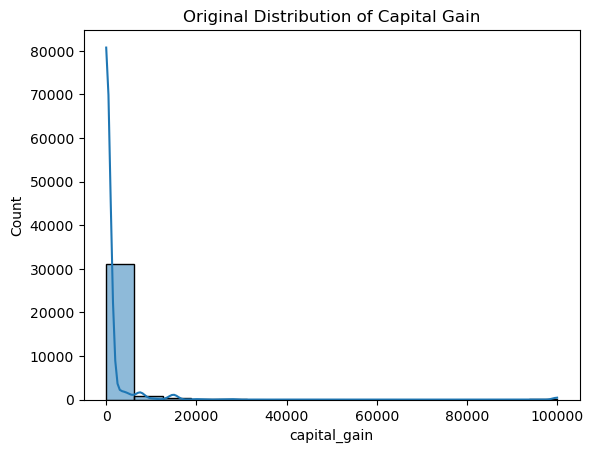

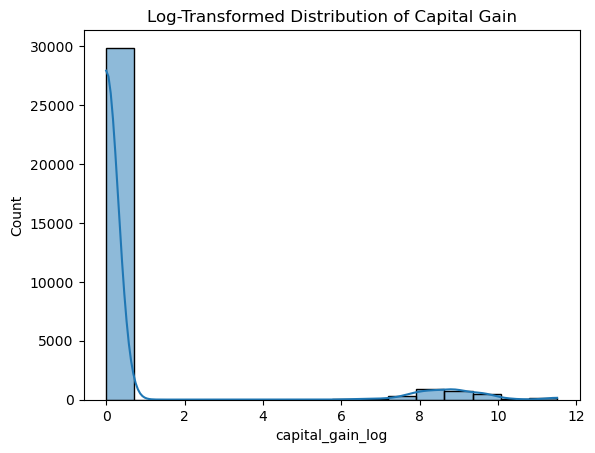


Log transformation applied to 'capital_gain'. This helps to reduce skewness and makes the feature's distribution closer to normal, which can improve the performance of linear models.
--------------------------------------------------


In [13]:
# --- Transform Skewed Numerical Feature ---
# 'capital_gain' and 'capital_loss' are highly skewed. We will apply a log transformation
# to 'capital_gain' and justify the choice.
sns.histplot(df_engineered['capital_gain'], kde=True)
plt.title('Original Distribution of Capital Gain')
plt.show()

# Apply log transformation (add 1 to handle zero values)
df_engineered['capital_gain_log'] = np.log1p(df_engineered['capital_gain'])

sns.histplot(df_engineered['capital_gain_log'], kde=True)
plt.title('Log-Transformed Distribution of Capital Gain')
plt.show()

print("\nLog transformation applied to 'capital_gain'. This helps to reduce skewness and makes the feature's distribution closer to normal, which can improve the performance of linear models.")
print("-" * 50)

In [14]:
# --- Outlier Detection with Isolation Forest ---
# Isolation Forest is effective at identifying outliers by isolating them from the rest of the data.
# Outliers can negatively impact model performance by skewing distributions and increasing variance.
model_if = IsolationForest(contamination=0.01, random_state=42)
outliers = model_if.fit_predict(df_engineered[numerical_features])
df_engineered['outlier'] = outliers
df_no_outliers = df_engineered[df_engineered['outlier'] != -1].drop('outlier', axis=1)

print(f"\nNumber of outliers detected and removed: {len(df_engineered[df_engineered['outlier'] == -1])}")
print("-" * 50)



Number of outliers detected and removed: 326
--------------------------------------------------


In [ ]:
# --- Predictive Power Score (PPS) Analysis ---
# PPS is a metric that measures the predictive power of a feature towards another,
# which can reveal non-linear relationships that a correlation matrix might miss.
# Calculate PPS matrix
pps_matrix = pps.matrix(df_no_outliers)
print("\nPPS Matrix:")
print(pps_matrix[['x', 'y', 'ppscore']].sort_values('ppscore', ascending=False))

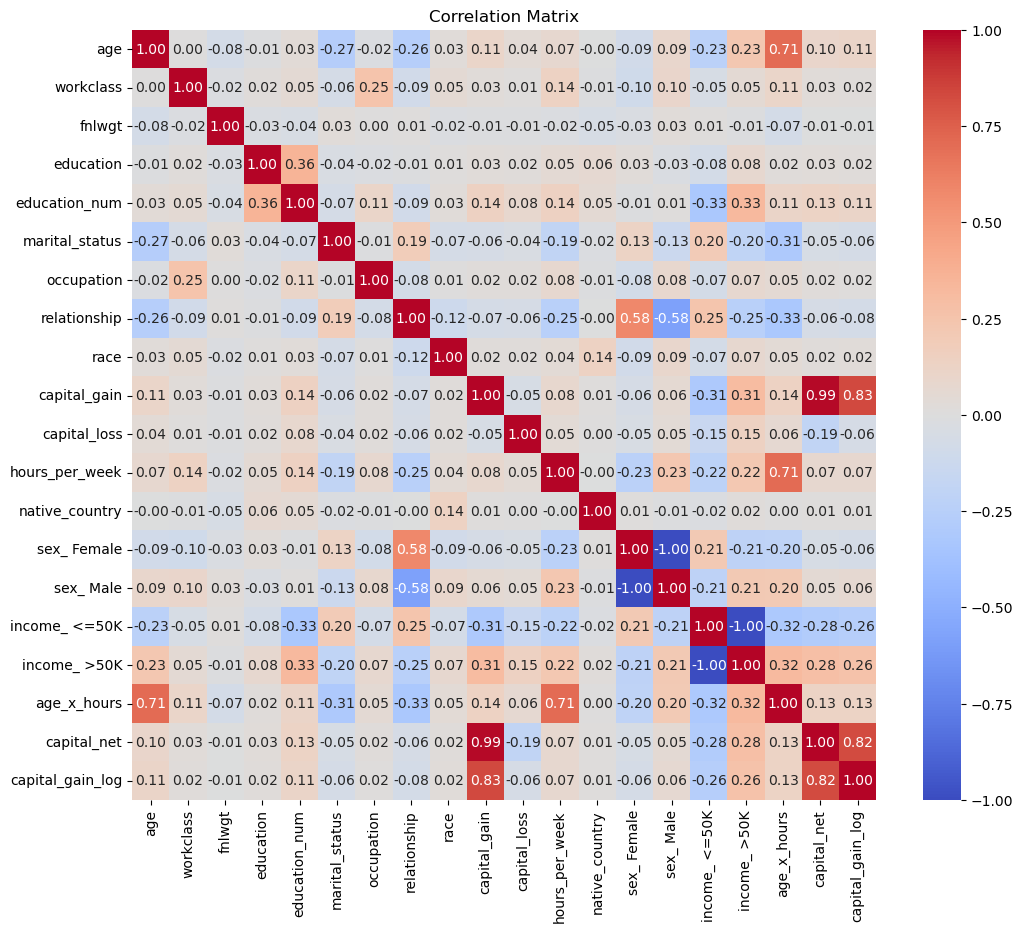


--- PPS vs. Correlation ---
The PPS matrix can reveal relationships (e.g., between categorical features and the target) that the correlation matrix, which only measures linear relationships between numerical features, cannot.


In [16]:

# --- Compare with Correlation Matrix ---
# Correlation measures linear relationships.
corr_matrix = df_no_outliers.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print("\n--- PPS vs. Correlation ---")
print("The PPS matrix can reveal relationships (e.g., between categorical features and the target) that the correlation matrix, which only measures linear relationships between numerical features, cannot.")